# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 9

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов


<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 35 баллов




-----

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

### <font color="blue">Легкая часть</font>
## Задача 1


### 1. Загрузка данных и предобработка   

#### **Профиль физика**
Загрузите [данные](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/code) по бинарной классификации астероидов в зависимости от различных параметров. 

Вашей целевой переменной будет являться столбец `pha`. Более подробно ознакомить с датасетом вы можете также [здесь](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/code)

In [6]:
data = pd.read_csv('dataset.csv')
data.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


Удалим ненужные колонки и колонки с категориальными данными, потому что мы пока не умеем с ними работать. 

In [7]:
data = data.drop(['id', 'spkid', 'full_name', 'pdes',
                  'name', 'prefix', 'neo', 'orbit_id', 
                  'equinox', 'class'], axis=1)

# переведем таргет в столбец 0 и 1
data['pha'] = LabelEncoder().fit_transform(data['pha'])

Проверьте, есть ли среди ваших данных пропуски. Если да, то удалите их.

In [8]:
data = data.dropna()

Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `H` для разных классов:

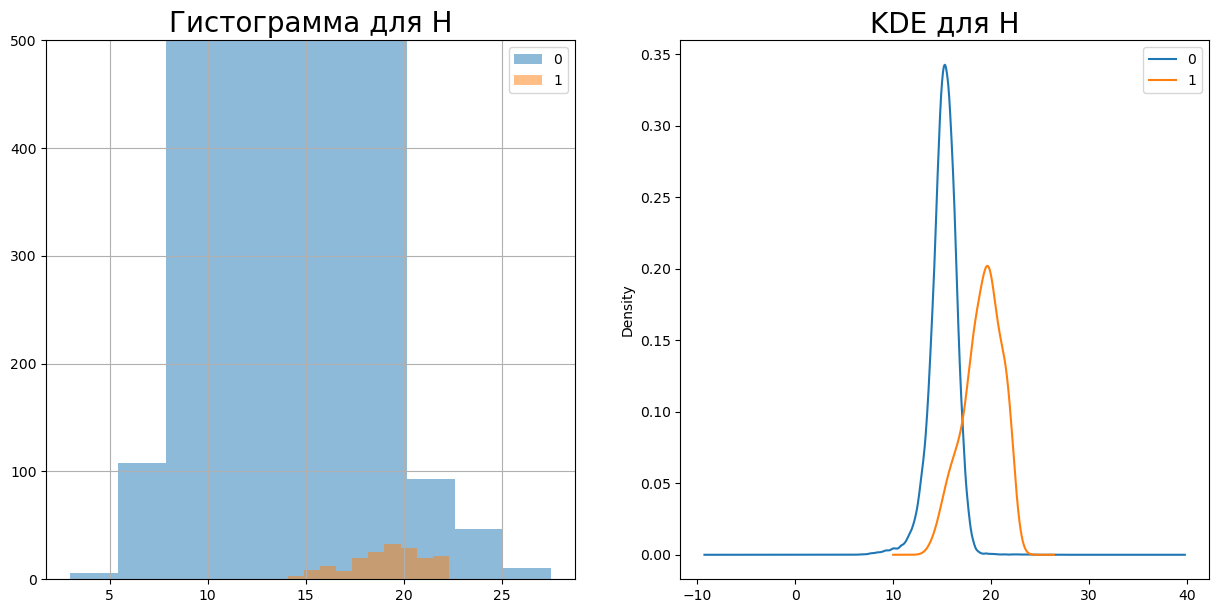

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
data.groupby("pha")['H'].hist(ax=axs[0], alpha=0.5, legend = True)
data.groupby("pha")['H'].plot(kind='kde', ax=axs[1], legend = True)
axs[0].set_title('Гистограмма для H', fontsize=20)
axs[1].set_title('KDE для H', fontsize=20);
axs[0].set_ylim(top = 500)
plt.show()

Какой из графиков качественнее отображает информацию о данных? С чем это связано?

**Ответ:** 2ой график лучше отображает информацию, так как по нему лучше видно поведение графиков относительно друг друга

Постройте гистограммы и ядерные оценки плотности для признаков из списка features отдельно для каждого класса.

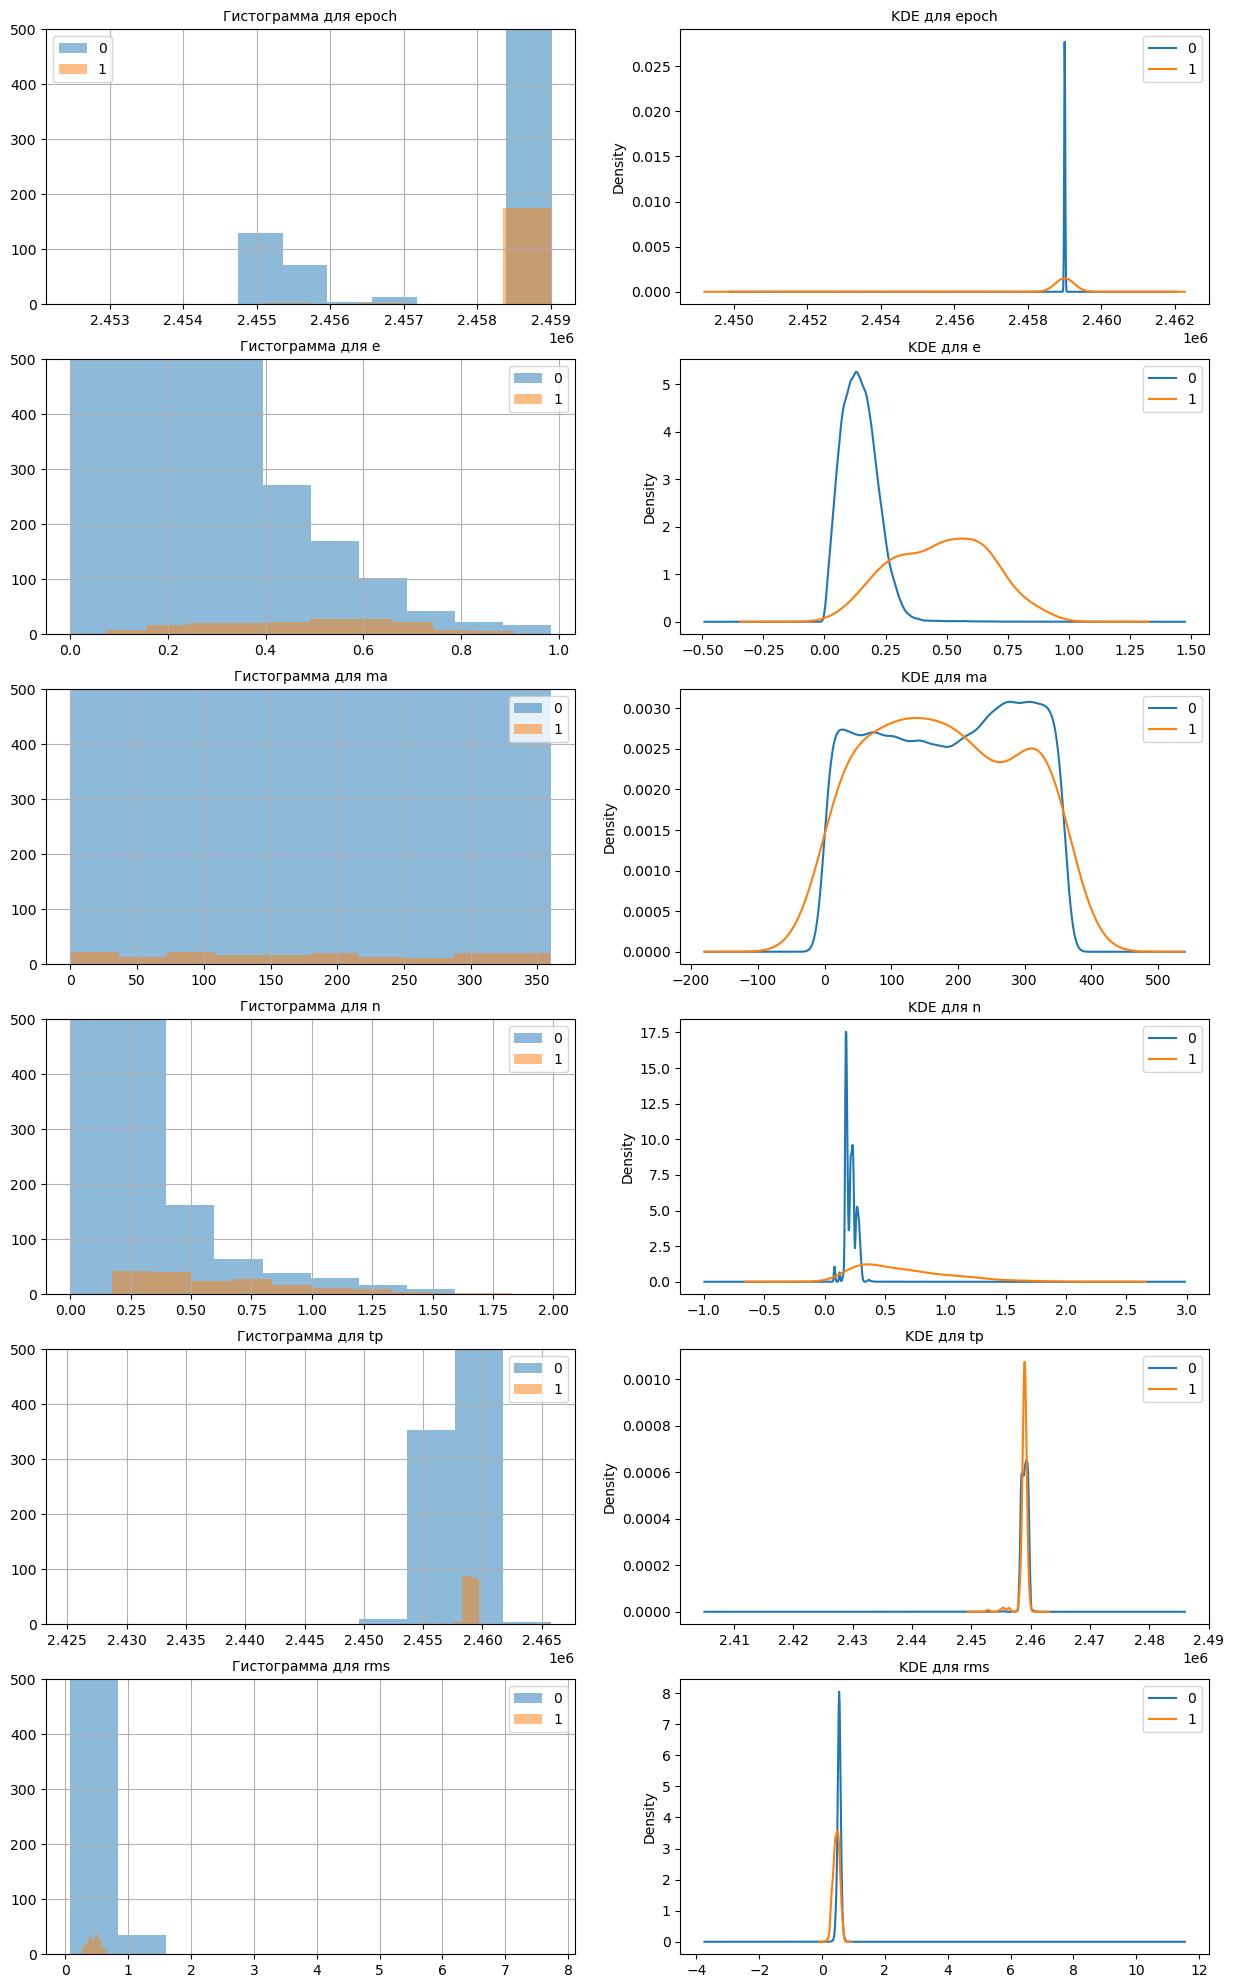

In [10]:
features = ['epoch', 'e', 'ma', 'n', 'tp', 'rms']
fig, axs = plt.subplots(6, 2, figsize=(15, 25))
for i in range(len(features)):
    data.groupby("pha")[features[i]].hist(ax=axs[i][0], alpha=0.5, legend = True)
    data.groupby("pha")[features[i]].plot(kind='kde', ax=axs[i][1], legend = True)
    axs[i][0].set_title('Гистограмма для %s' %features[i], fontsize=10)
    axs[i][1].set_title('KDE для %s' %features[i], fontsize=10);
    axs[i][0].set_ylim(top = 500)
plt.show()

Какие выводы вы можете сделать из полученный графиков?

**Вывод:** достаточно хорошо разделимы классы по признаку e и H

### 2. Обучение модели

Продолжайте использовать выбранные вами данные.

Создайте массив признаков и массив таргета. Разбейте ваши данные на обучающую и тестовую выборки в отношении 7:3.

In [11]:
data.head()

,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
0,0,3.40,939.400,0.0900,0.200,2458600.5,58600,20190427.0,0.076009,2.769165,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.43301
1,0,4.20,545.000,0.1010,18.000,2459000.5,59000,20200531.0,0.229972,2.773841,...,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,0.35936
2,0,5.33,246.596,0.2140,10.594,2459000.5,59000,20200531.0,0.256936,2.668285,...,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,0.33848
3,0,3.00,525.400,0.4228,0.200,2458600.5,58600,20190427.0,0.088721,2.361418,...,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,0.39980
4,0,6.90,106.699,0.2740,3.140,2459000.5,59000,20200531.0,0.190913,2.574037,...,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,0.52191


In [17]:
X = data.iloc[:, 1:35]
y = data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

Отмасштабируйте свои признаки.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X = X_train)
X_test = scaler.transform(X = X_test)

Обучите модель логистической регрессии.

In [20]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

Сделайте предсказание для тестовой выборки и оцените качества полученного предсказания.

In [26]:
print(clf.predict(X_test).mean())
accuracy = accuracy_score(y_test, clf.predict(X_test))
print(f'Accuracy: {accuracy:.3f}')

0.0009404468393360954
Accuracy: 0.999


**Вывод:** в данной ситуации эта метрика не очень информативна, так как классификатор, предсказывающий всегда 0 класс, имел бы accuracy $\approx 90\%$ (0 класс имеет больше значений)



### <font color="orange">Сложная часть</font>


## Задача 2

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. Вы уже сталкивались с этим в линейной регрессиия, однако регуляризацию также успользуют в решениях задач классификации.

Пусть дана выборка $(x_1, Y_1), ..., (x_n, Y_n)$, где $x_i = (x_{i1}, ..., x_{id}) \in \mathscr{X}$ и случайный класс $Y_i \sim Bern\left(\sigma (\theta^T x_i)\right)$. В задаче логистической регрессии максимизируется функция правдоподобия, а точнее - ее логарифм.
$$L_Y (\theta)= \prod\limits_{i=1}^n \sigma (\theta^T x_i)^{Y_i} \left(1 - \sigma (\theta^T x_i)\right)^{1-Y_i}$$

$$\ell_Y(\theta) = \log L_Y(\theta)$$

$$\ell_Y(\theta) \longrightarrow \max_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. В случае логистической регрессии мы максимизируем функцию правдоподобия, поэтому норма добавляется со знаком минус. Тем самым решается задача
$$\ell_Y(\theta) - \lambda \|\theta\|^2\longrightarrow \max_\theta.$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. В данном случае мы получили логистическую регрессию **Ridge-регуляризацией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике.

**1.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для 
- модели логистической регрессии без регуляризации
- модели логистической регрессии c ridge-регуляризацией

Батч : B = {$\overline{x} : x_i = (x_{i1}, ..., x_{id})$, i = {1...b}, b$\leq$n}

Модель логистической регрессии без регуляризации. Градиентный спуск:

$$\theta_{t+1} = \theta_{t} - \eta \sum_i^n{(Y_i - \sigma(\theta_{t}^T x_i))x_i} $$

 Модель логистической регрессии без регуляризации. Стохастический градиентный спуск:
 
 $$\theta_{t+1} = \theta_{t} - \eta \frac{1}{b} \sum_i^b{(Y_{ij} - \sigma(\theta_{t}^T x_{ij}))x_{ij}} $$
 
 Модель логистической регрессии c ridge-регуляризацией. Стохастический градиентный спуск:
 
$$\theta_{t+1} = \theta_{t} - \eta \frac{1}{b} \sum_i^b{(Y_{ij} - \sigma(\theta_{t}^T x_{ij}))x_{ij}} - 2 \lambda\eta\theta_{t} $$
 
 Модель логистической регрессии c ridge-регуляризацией. Градиентный спуск:
 
 $$\theta_{t+1} = \theta_{t} - \eta {(Y_i - \sigma(\theta_{t}^T x_i))x_i} - 2 \lambda\eta\theta_{t}$$
 
 Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**2.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для модели с ridge-регуляризацией необходима стандартизация. Почему? Можно представить, что признаки имеют некоторые различные единицы измерения.

Ответ: у признаков может быть разный масштаб + размерность. То есть необходимо признаки одинаково/равноправно приблизить к нулю. Для достижения таких свойств: у всех признаков будет среднее = 0, дисперсия = 1

## Задача 3

В этой задаче вам предстоит реализовать стохастический градиентный спуск, используйте данные из первого задания.

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [95]:
eta = 0.02
n_epoh = 100
def sigma (theta, xi):
    return 1/(1 + np.exp(-xi.dot(theta)))

Реализуйте процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели логистической регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256.

In [96]:
def coeffic(X_train, y_train, theta, eta, b=128):
    coef_in = theta
    for i in range(b, X_train.shape[0], b):
        X_batch = X_train[i-b : i]       
        y_batch = y_train[i-b : i]
        a = sigma(theta,X_batch) - y_batch
        coef_in -= eta * a.T.dot(X_batch) / b
    return coef_in

Нарисуйте графики зависимости значений метрики accuracy от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Итераций = n_epoh = 100

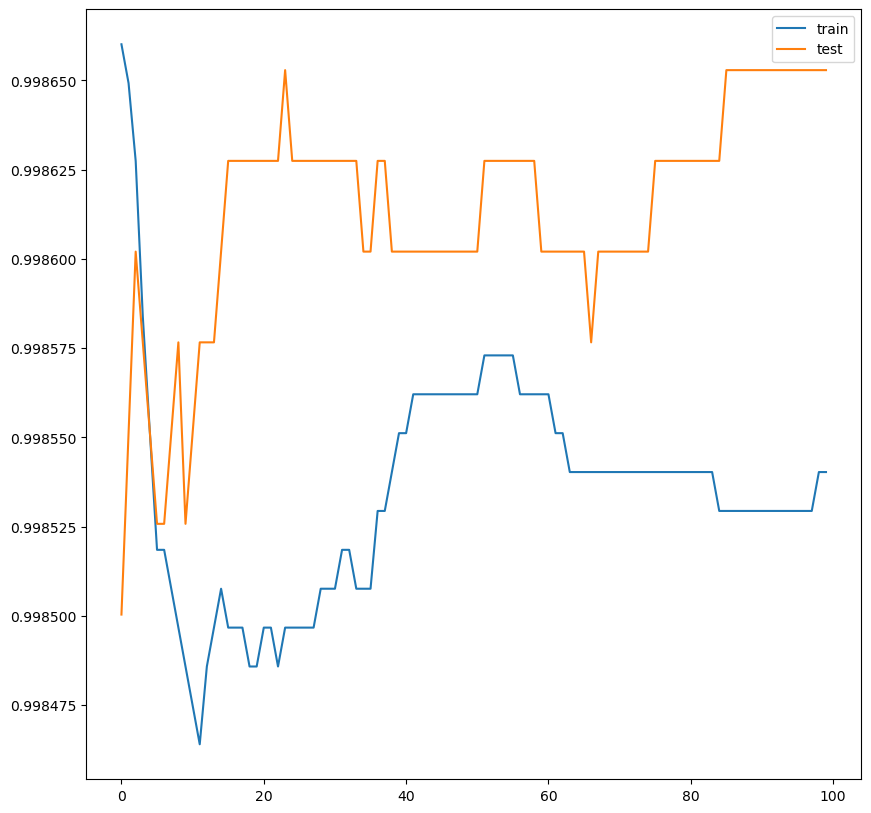

In [101]:
def get_accuracy(X, y, n_epoh, fit_intercept=True, pred=False):
    
    if fit_intercept == True:
        X = np.concatenate((X, np.ones(X.shape[0])[np.newaxis, :].T), axis=1)
    
    theta_in = np.zeros(X.shape[1])
    accuracy = []
    
    theta = theta_in
    for epoh in range(n_epoh):
        theta = coeffic(X, y, theta, eta)
        accuracy.append(accuracy_score(y, (sigma(theta, X) > 0.5).astype(int)))
    if pred == True:
        return theta
    else:
        return accuracy

fig = plt.figure(figsize=(10, 10))
plt.plot(np.arange(n_epoh), get_accuracy(X_train, y_train, n_epoh), label = 'train')
plt.plot(np.arange(n_epoh), get_accuracy(X_test, y_test, n_epoh), label = 'test')
plt.legend()
plt.show()

Посчитайте ошибку на тестовой выборке.

In [102]:
thetaa = get_accuracy(X_test, y_test, n_epoh, fit_intercept=True, pred=True)
thetaa

array([ 3.02931467e-01,  4.51515039e-02, -2.70576507e-02, -3.55078492e-02,
        2.71982923e-04,  2.71982913e-04, -2.01132824e-03,  4.14980326e-01,
        6.25326459e-02, -4.67074251e-02,  1.92188338e-02, -4.15939901e-02,
        3.12995852e-02,  5.37837657e-02,  7.21583095e-02,  1.82855983e-01,
        4.09655746e-03, -1.57108679e-02,  4.39502665e-02,  4.39502665e-02,
       -8.68831791e-02, -8.68831791e-02,  2.98616393e-03,  1.20749627e-03,
       -4.32430608e-02, -3.91180576e-02, -1.21388892e-02,  4.42159795e-03,
        8.97945053e-03, -3.51860424e-03, -3.78835539e-03,  1.36041179e-02,
        3.93301300e-03, -2.61647497e-01, -6.39012727e+00])

In [103]:
X_testt = np.concatenate((X_test, np.ones(X_test.shape[0])[np.newaxis, :].T), axis=1)
accuracy_score(y_test, (sigma(thetaa, X_testt) > 0.5).astype(int))

0.9986528734463564

Сделайте выводы. Различие с accuracy из 1 задания в сотые, шаги стохастического градиентного спуска шумные